# Introduction

Biodiversity is essential to ecosystem health, but is threatened by habitat loss, climate change, and other human activities. National parks aim to conserve wildlife, but even protected areas experience biodiversity declines. Tracking species distributions and conservation status in parks can inform management efforts.

This project analyzes National Park Service biodiversity data to understand species status and distributions in national parks. Key questions include:

- What is the distribution of conservation status for observed species? Are certain species more endangered?
- How does species prevalence differ between parks? Which species are most widespread?
- Are there significant differences between species and their conservation status?

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

Defining a clear project scope provides direction and focus when starting a new data analysis project. This scope contains four key sections:

- Goals: The high-level objectives and intentions for the project. What questions are we trying to answer?

- Data: Reviewing the available data to ensure it can support the project goals. For this project, biodiversity data has already been obtained.

- Analysis Plan: The methods and specific research questions to analyze the data and meet the goals. What techniques and visualizations will be used?

- Evaluation: Drawing conclusions from the analysis to arrive at findings and insights that achieve the project goals. What stories does the data tell us?


### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. My goal is to help conserve at-risk species and maintain biodiversity within the national parks. My key objectives are to analyze species characteristics, conservation status, and distributions across parks. Specifically, I aim to explore these questions:
- What is the distribution of conservation status for observed species? Are certain species more endangered?
- How does species prevalence differ between parks? Which species are most widespread?
- Are there significant differences between species and their conservation status?

By analyzing biodiversity data to uncover patterns, trends, and insights related to these questions, I aim to generate data-driven recommendations to help guide conservation priorities and actions across national parks. My goal is to support the Park Service mission of protecting vulnerable species.

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


### Import Python Module
First, let import necessary python module for this project

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Import the data
To analyze species conservation status and park observations, the dataset is loaded into `Pandas DataFrames` for exploration in `Python`. This allows flexible manipulation and visualization of the biodiversity data.

The `Observations.csv` is read into a DataFrame called `observations` and `Species_info.csv` is read into a DataFrame called `species`. The `.head()` method is used to glimpse the first few rows of each DataFrame and verify the data loaded correctly.

#### Species
The `Species_info.csv` containt information about difference spieces in the National Parks. The data include:
- `Category:` Category of each species
- `Scientific_name:` The scientific name of each species
- `Common_Names:` The common name of eacjh species
- `Conservation_status:` the species concervation status

In [319]:
species = pd.read_csv('species_info.csv')
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


#### Observations
The `Observations.csv` record the sighting of difference spieces in the Nation Parks. The data including:
- `Scientific_name :` The sciencetis name of the species
- `Park_name :` Name of the national park
- `Observations :` The number of observations in the last 7 days

In [320]:
observations = pd.read_csv('observations.csv')
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


#### Data Shape
Next, there will be a check for the dimensions of the data sets. As you can see, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [321]:
print("Species data shaoe: ", species.shape)
print("Observations data shape: ", observations.shape)

Species data shaoe:  (5824, 4)
Observations data shape:  (23296, 3)


### Explore the data

#### Species

Let's explore the `species` data a little more deepth. There are `5541 unique species` in the `scientific_name` column. There seems to be a lot of animal species is recorded in the National Parks

In [322]:
print("Number of species: ", species.scientific_name.nunique())

Number of species:  5541


Next, there is `7 animal categories` is recored in the data including animals and plants

In [323]:
print("number of categories: ", species.category.nunique())
print("Categories: ", species.category.unique())

number of categories:  7
Categories:  ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Let's see how many species is recorded by each catagory. It is interesting that `Vascular Plant` is the largest share of species with 4470 species recorded and `Reptile` is the smallest share of species with 79 species

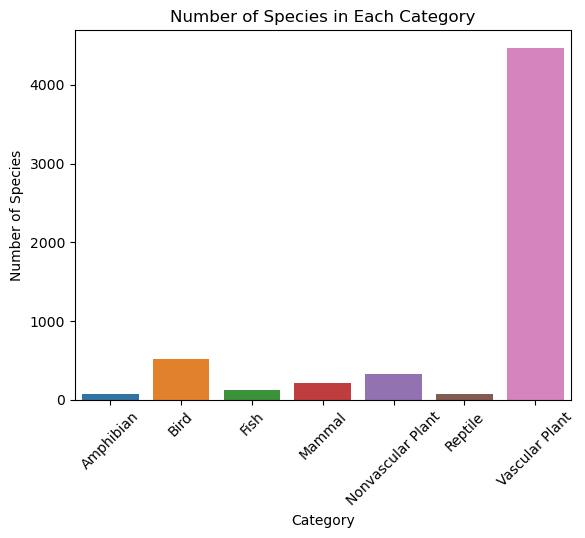

In [324]:
species.groupby('category').size().reset_index(name='counts')
num_species = sns.barplot(x=species.groupby("category").size().index, y=species.groupby("category").size().values)
num_species.set_xticklabels(num_species.get_xticklabels(), rotation=45)
plt.title("Number of Species in Each Category")
plt.ylabel("Number of Species")
plt.xlabel("Category")
plt.show()     

([<matplotlib.patches.Wedge at 0x2a3dd9a90>,
 [Text(-0.04745438833198572, 1.09897592377087, 'Amphibian'),
  Text(-0.3950539967228692, 1.0266120687354534, 'Bird'),
  Text(-0.7227490154529597, 0.8292369146762447, 'Fish'),
  Text(-0.8622298481719746, 0.6830517468840366, 'Mammal'),
  Text(-1.023599400712827, 0.4027955645986456, 'Nonvascular Plant'),
  Text(-1.0872076850936805, 0.16727058759160493, 'Reptile'),
  Text(0.7338657053136071, -0.819415112482411, 'Vascular Plant')],
 [Text(-0.02588421181744675, 0.5994414129659291, '1.4%'),
  Text(-0.2154839982124741, 0.5599702193102473, '8.9%'),
  Text(-0.3942267357016143, 0.4523110443688607, '2.2%'),
  Text(-0.47030718991198606, 0.37257368011856534, '3.7%'),
  Text(-0.5583269458433601, 0.2197066715992612, '5.7%'),
  Text(-0.593022373687462, 0.09123850232269358, '1.4%'),
  Text(0.4002903847165129, -0.4469536977176786, '76.8%')])

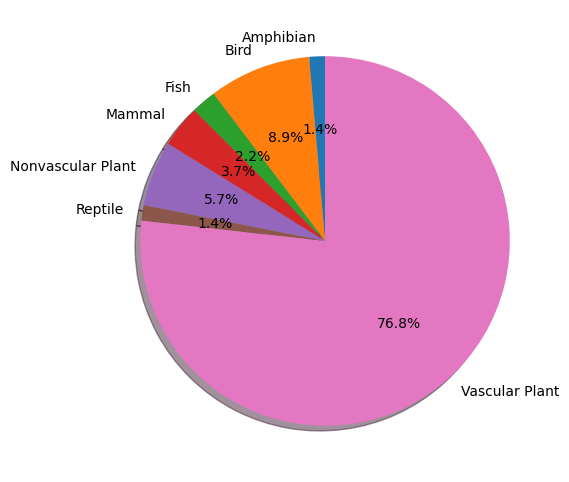

In [325]:
plt.figure(figsize=(8, 6)) # set the size of the plot
plt.pie(species.groupby('category').size(), labels=species.groupby('category').size().index, autopct='%1.1f%%', shadow=True, startangle=90)

Another column to explore is `conservation_status`. The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values. 

In [326]:
print("Number of types of observation status: ", species.conservation_status.nunique())
print("Observation status: ", species.conservation_status.unique())

Number of types of observation status:  4
Observation status:  [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Let's count the number of observations in the breakdown of the categories in `conservation_status`. There are `5,633 nan values` which means that they are species without concerns. On the other hand there are `161 species of concern`, `16 endangered`, `10 threatened`, and `4 in recovery`. 

Seems like there is a lot of species are not in concern.


na values in conservation_status: 5633
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


<Axes: xlabel='conservation_status', ylabel='count'>

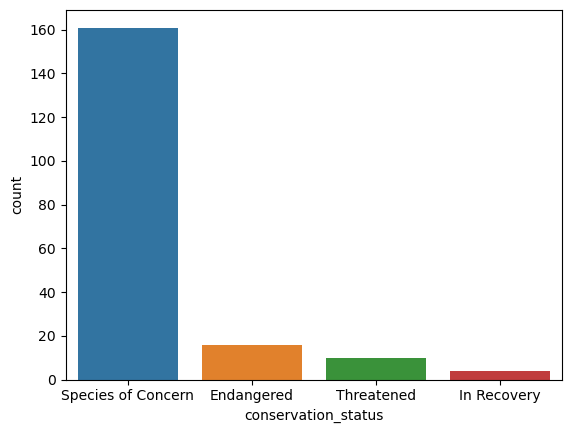

In [327]:
print(f"na values in conservation_status: {species.conservation_status.isna().sum()}")
print(species.conservation_status.value_counts())
sns.countplot(x=species.conservation_status, data=species)

#### Observation

Now let take a look in the `observation` data. There are only 4 National Parks in the record: `Great Smoky Mountains National Park`, `Yosemite National Park`, `Bryce National Park`, and `Yellowstone National Park`

In [328]:
print("Number of National Parks: ", observations.park_name.nunique())
print("National Parks: ", observations.park_name.unique())

Number of National Parks:  4
National Parks:  ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here are the total observation is logged in the data: `3,314,739 times in 7 days`

In [329]:
print("total number of observations: ", observations.observations.sum())

total number of observations:  3314739


The next phase of analysis will involve a deeper examination of the `conservation_status` column in the species dataframe. This column contains several possible classifications:

`Species of Concern:` Species whose numbers are declining or that seem to need conservation efforts.
`Threatened:` Species that are vulnerable to endangerment in the near future.
`Endangered:` Species seriously at risk of extinction.
`In Recovery:` Species that were formerly classified as Endangered but are no longer in imminent danger of extinction.
During the initial exploration, many `NaN` values were found in this column. These missing values will need to be replaced with `No Intervention` to indicate species that are not currently subject to any conservation efforts.

Cleaning the `conservation_status` labels and handling the missing values appropriately will enable more effective analysis of species facing various levels of endangerment.

In [330]:
species.fillna('No Intervention', inplace=True)
species.conservation_status.value_counts()

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

After cleaning the `conservation_status` labels, we can analyze the breakdown of species in each status category, excluding those labeled `No Intervention`. The table and chart below explore the different animal classes within each status:

- For species classified as `Endangered`, there were 7 endangered mammals and 4 endangered birds.
- In the `In Recovery` category, there were 3 birds and 1 mammal.

This initial view of the data suggests birds may be rebounding from endangerment more successfully than mammals. Additional investigation would be needed to confirm if mammals are recovering more slowly from threatened statuses overall compared to other animal classes like birds. Comparing recovery rates between taxonomic groups can provide insights into what conservation efforts and protections may be more or less effective for different types of animals.

In [331]:
conservationCategory = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

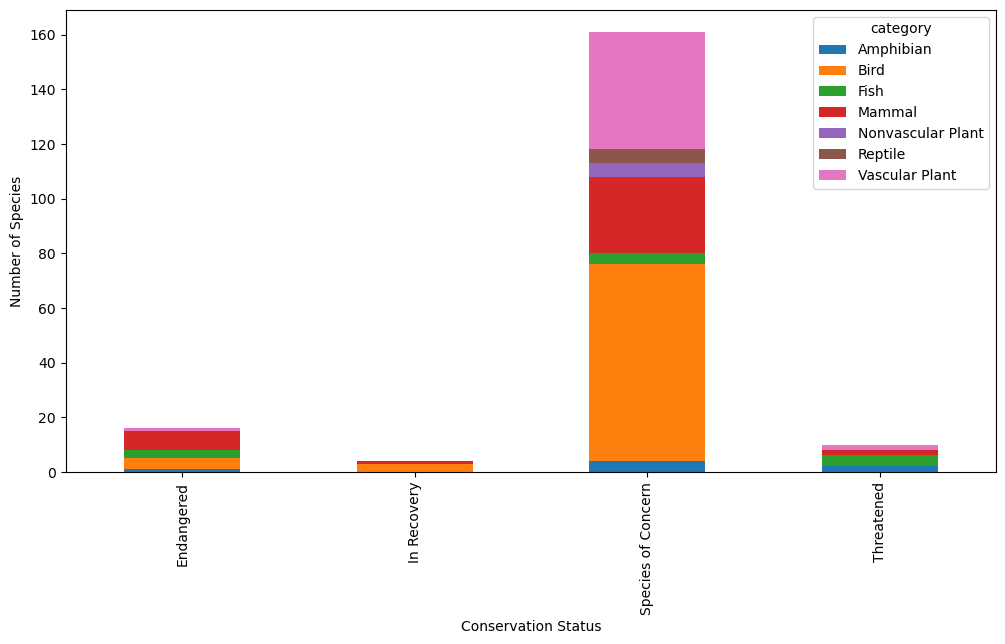

In [332]:
ax = conservationCategory.plot(kind='bar', figsize=(12,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

#### In conservation
The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`

In [333]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [334]:
category_counts = species.groupby(['category', 'is_protected'])\
    .scientific_name.nunique().reset_index()\
        .pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'is_protected']
category_counts['percent_protected'] = round((category_counts.protected / (category_counts.protected + category_counts.not_protected))*100,2)
category_counts['percent_not_protected'] = round((category_counts.not_protected / (category_counts.protected + category_counts.not_protected))*100,2)
category_counts   


,category,not_protected,protected,percent_protected,percent_not_protected
0,Amphibian,72,7,8.86,91.14
1,Bird,413,75,15.37,84.63
2,Fish,115,11,8.73,91.27
3,Mammal,146,30,17.05,82.95
4,Nonvascular Plant,328,5,1.50,98.50
5,Reptile,73,5,6.41,93.59
6,Vascular Plant,4216,46,1.08,98.92


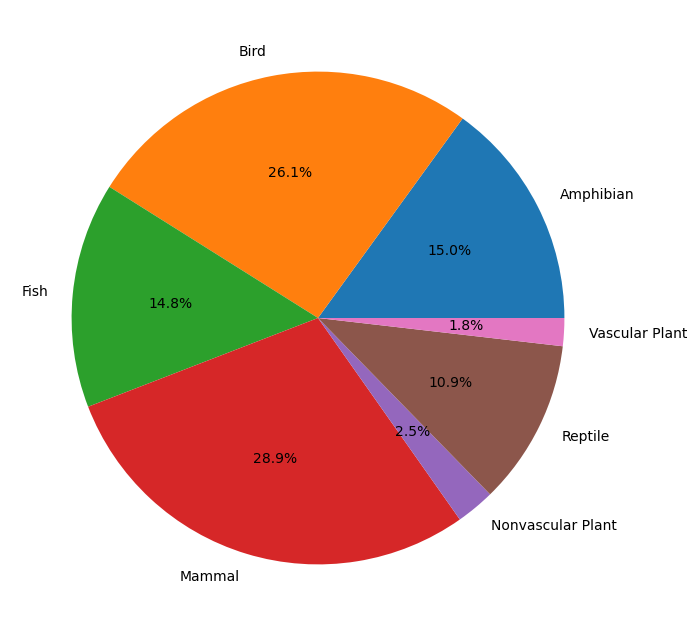

In [335]:
#create pie chart to show percentage of protected species for each category
plt.figure(figsize=(10,8))
plt.pie(category_counts.percent_protected, labels=category_counts.category, autopct='%1.1f%%')
plt.show()

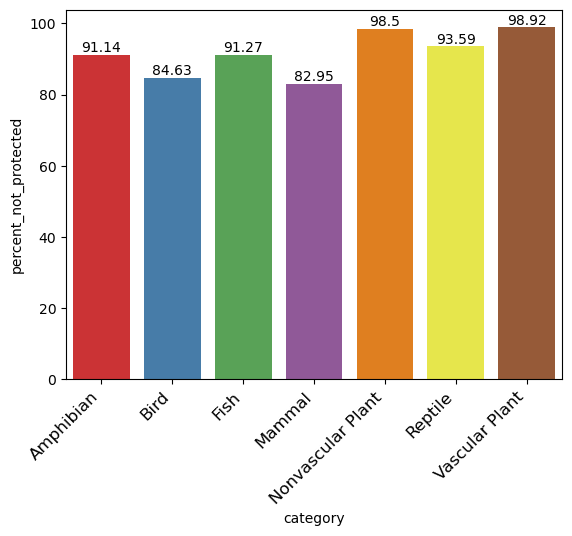

In [336]:
#create bar chart to show percentage of not protected species for each category
ax = sns.barplot(data=category_counts, x='category', y='percent_not_protected', palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12, fontweight='light',
     color='black', fontstyle='normal', fontfamily='sans-serif',wrap = False)

for i in ax.containers:
    ax.bar_label(i,)

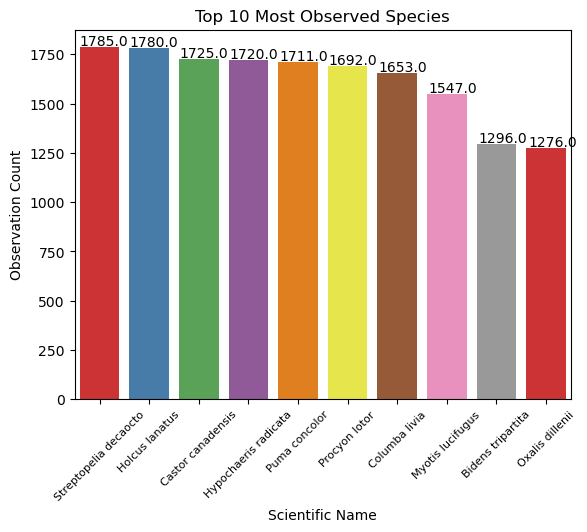

In [337]:
# species have highest observed count
species_count = observations.groupby('scientific_name').observations.sum().reset_index()
species_co = species_count.sort_values(by='observations', ascending=False).head(10)
ax = sns.barplot(data=species_co, x='scientific_name', y='observations', palette="Set1")
plt.xticks(rotation=45, fontsize = 8)
plt.xlabel('Scientific Name')
plt.ylabel('Observation Count')
plt.title('Top 10 Most Observed Species')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


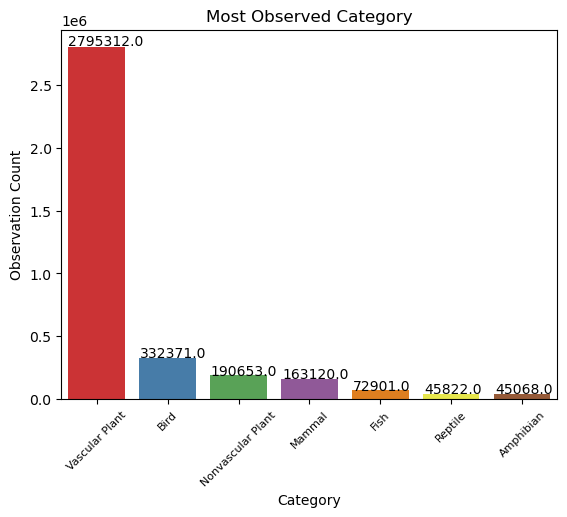

In [338]:
#What is the most observed category of species?
species_count = pd.merge(species_count, species, on='scientific_name')
species_count = species_count.groupby('category').observations.sum().reset_index()
species_count = species_count.sort_values(by='observations', ascending=False)
ax = sns.barplot(data=species_count, x='category', y='observations', palette="Set1")
plt.xticks(rotation=45, fontsize = 8)
plt.xlabel('Category')
plt.ylabel('Observation Count')
plt.title('Most Observed Category')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()    

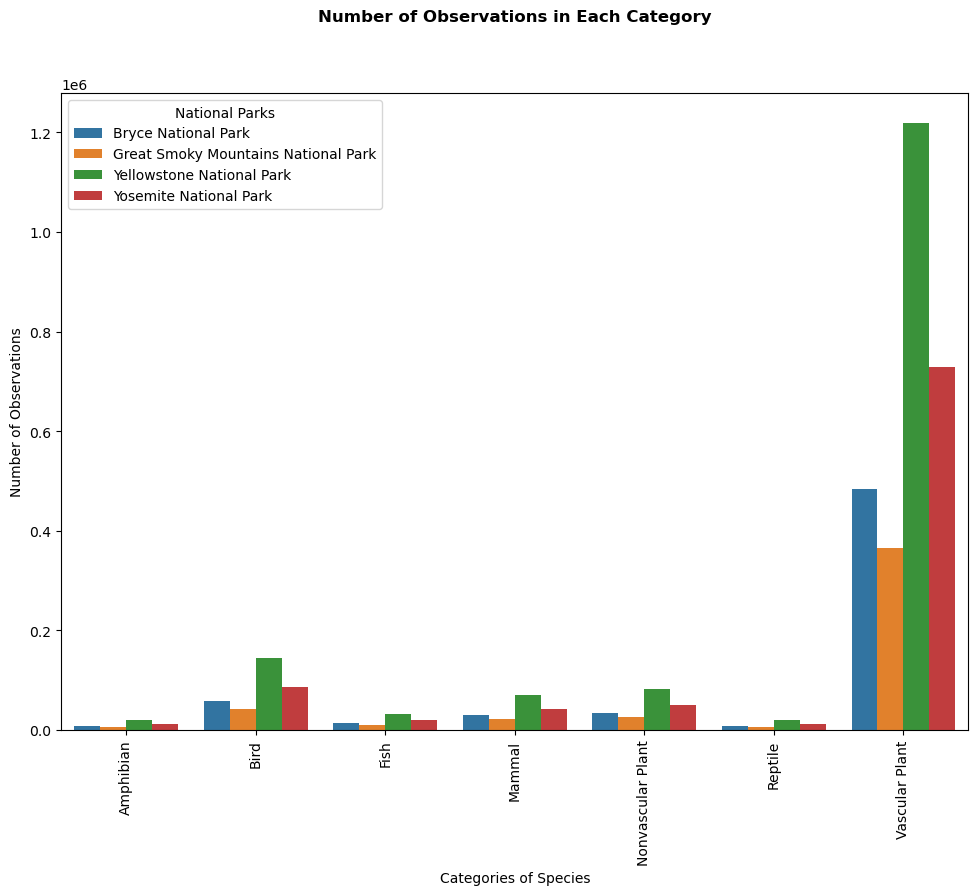

In [352]:
grouped_multiple = data[['category', 'park_name','observations']].groupby(['category', 'park_name']).agg({'observations': 'sum'})
grouped_multiple.columns = ['observation_sum']
grouped_multiple = grouped_multiple.reset_index()


fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(ax=ax, x = grouped_multiple.category, y = grouped_multiple.observation_sum, hue=grouped_multiple.park_name)
plt.title('Number of Observations in Each Category', y=1.1, fontweight="bold")
ax.set_ylabel('Number of Observations')
ax.set_xlabel('Categories of Species')
plt.xticks(rotation=90)
plt.tight_layout
plt.legend(title='National Parks', loc='upper left')
plt.show()